In [29]:
import numpy as np
import random
from citipy import citipy
import matplotlib.pyplot as plt

In [3]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
lats = np.random.uniform(-90 , 90 , size = 1500)

long = np.random.uniform(-180 , 180 , size = 1500)

lat_langs = zip(lats , long)

lat_langs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_langs)

In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

albany au
port alfred za
ushuaia ar
almenevo ru
yellowknife ca
busselton au
belushya guba ru
mataura pf
padang id
broome au
longyearbyen sj
luderitz na
illoqqortoormiut gl
rikitea pf
nemuro jp
makaha us
golden us
dragor dk
mataura pf
busselton au
kodiak us
poronaysk ru
lebu cl
ushuaia ar
tautira pf
guerrero negro mx
cape town za
hithadhoo mv
poronaysk ru
upernavik gl
ketchikan us
mahebourg mu
hermanus za
soc trang vn
rikitea pf
ushuaia ar
dikson ru
coihaique cl
lebu cl
tsihombe mg
nome us
kayes ml
rikitea pf
pallisa ug
novo cruzeiro br
rikitea pf
yatou cn
busselton au
pevek ru
stephenville ca
bredasdorp za
bethel us
umzimvubu za
hermanus za
tommot ru
grand bank ca
mar del plata ar
iskateley ru
rikitea pf
nizhniy tsasuchey ru
vaini to
arraial do cabo br
khatanga ru
bluff nz
cape town za
dingle ie
ossora ru
longyearbyen sj
aklavik ca
egvekinot ru
busselton au
kodiak us
east london za
albany au
caravelas br
punta arenas cl
bengkulu id
sao miguel br
cristalina br
neepawa ca
tiksi ru
dormid

In [8]:
# Create an empty list to hold the cities 

cities = []

# Identify the nearest city for each lat and lang combination 

for coordinate in coordinates:

    city = citipy.nearest_city(coordinate[0] , coordinate[1]).city_name

    #If the the city is unique, then add it to the list of citites 

    if city not in cities:

        cities.append(city)

# Print the city count 

len(cities)

617

In [9]:
# Import the request library 

import requests

# Import API key 

from config import weather_api_key

In [ ]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [ ]:
# Create an end point URL for a city 

city_url = url + '&q=' + 'Boston'

#print(city_url)

In [12]:
city_url = url + '&q=' + 'Boston'

city_weather = requests.get(city_url)

city_weather

<Response [200]>

In [13]:
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 58.21,
  'feels_like': 55.65,
  'temp_min': 50.14,
  'temp_max': 63.39,
  'pressure': 1033,
  'humidity': 41},
 'visibility': 10000,
 'wind': {'speed': 16.11, 'deg': 100},
 'clouds': {'all': 75},
 'dt': 1650556168,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1650534822,
  'sunset': 1650583907},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [14]:
# Handeling errors and seeing if our weather data was found
city_url = url + '&q=' + 'Boston'

city_weather = requests.get(city_url)

if city_weather.status_code == 200:

    print(f'City Weather Was Found')

else:

    print(f'City Weather Was Not Found')


City Weather Was Found


In [15]:
boston_data = city_weather.json()

boston_data['sys']

{'type': 2,
 'id': 2013408,
 'country': 'US',
 'sunrise': 1650534822,
 'sunset': 1650583907}

In [16]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 63.39 41 75 16.11


In [17]:
# Changing the time time stamp out put to ISO 

from datetime import datetime

date = boston_data['dt']

# Converting the UTC date to a date format with year, month, day, hours, minutes, and seconds.

datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-04-21 15:49:28'

In [18]:
import time

from datetime import datetime

from citipy import citipy

city_data = []

# Begining of logging 

print('Beginning Data Retriveal      ')

print('------------------------------')

# Counters NOTE: initialized the counters at 1 
# because we want the first iteration of the logging for each recorded response and the set to start at 1.

record_count = 1

set_count = 1 

# Looping through the citites 

for i, city in enumerate(cities):

    # Groupping cities in sets of 50 

    if (i % 50 == 0 and i >= 50):

        set_count += 1 

        record_count = 1 

        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


    

Beginning Data Retriveal      
------------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | almenevo
City not found. Skipping...
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | padang
Processing Record 10 of Set 1 | broome
Processing Record 11 of Set 1 | longyearbyen
Processing Record 12 of Set 1 | luderitz
Processing Record 13 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | nemuro
Processing Record 16 of Set 1 | makaha
Processing Record 17 of Set 1 | golden
Processing Record 18 of Set 1 | dragor
Processing Record 19 of Set 1 | kodiak
Processing Record 20 of Set 1 | poronaysk
Processing Record 21 of Set 1 | lebu


In [20]:
import pandas as pd 

# Converting dictionaries into a data frame 

city_data_df = pd.DataFrame(city_data)

new_column_order = ['City' , 'Country' , 'Date' , 'Lat' , 'Lng' , 'Max Temp' , 'Humidity' , 'Cloudiness' , 'Wind Speed']

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2022-04-21 15:41:57,42.6001,-73.9662,56.03,43,100,3.00
1,Port Alfred,ZA,2022-04-21 15:42:45,-33.5906,26.8910,77.18,52,70,2.84
2,Ushuaia,AR,2022-04-21 15:50:44,-54.8000,-68.3000,44.22,65,75,17.27
3,Yellowknife,CA,2022-04-21 15:52:14,62.4560,-114.3525,19.92,53,20,4.61
4,Busselton,AU,2022-04-21 15:42:41,-33.6500,115.3333,59.27,62,0,15.23
5,Mataura,NZ,2022-04-21 15:52:39,-46.1927,168.8643,47.48,98,100,5.70
6,Padang,ID,2022-04-21 15:52:39,-0.9492,100.3543,78.84,83,94,2.77
7,Broome,US,2022-04-21 15:52:39,42.2506,-75.8330,56.70,53,100,15.01
8,Longyearbyen,SJ,2022-04-21 15:52:40,78.2186,15.6401,31.84,69,40,0.00
9,Luderitz,NA,2022-04-21 15:52:40,-26.6481,15.1594,66.34,70,1,9.10


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

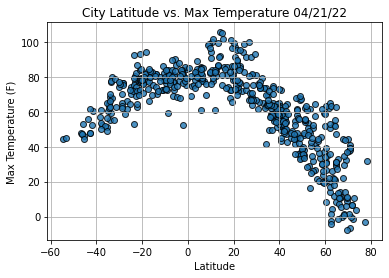

In [30]:
# Extracting relevant fields from the Dataframe

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

today = time.strftime("%x")

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot 
plt.show()